#### Balaji Kartheek
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (in years)

Outcome: Class variable (0 or 1)

## 9. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv(r"C:\Users\tbala\OneDrive\Desktop\Academics\DataSets\diabetes_pima.csv")

In [3]:
df.head()

,id,preg,plas,pres,skin,insu,mass,pedi,age,class
0,1,6,148,72,35,0,33.6,0.627,50,tested_positive
1,2,1,85,66,29,0,26.6,0.351,31,tested_negative
2,3,8,183,64,0,0,23.3,0.672,32,tested_positive
3,4,1,89,66,23,94,28.1,0.167,21,tested_negative
4,5,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
mapping = {"tested_positive":1, "tested_negative":0}

df['class'] = df['class'].map(mapping)

In [5]:
df = df.drop('id',axis=1)

In [6]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.nunique()    # Unique values for each attribute

preg      17
plas     136
pres      47
skin      51
insu     186
mass     248
pedi     517
age       52
class      2
dtype: int64

<AxesSubplot:>

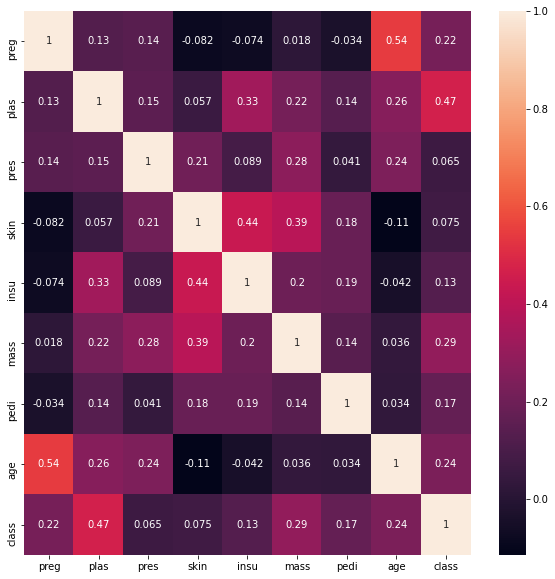

In [10]:
plt.figure(figsize=(10,10)) 
sns.heatmap(df.corr(), annot=True)

## 10. Compute mean & standard deviation , tabulate and visualize the age of the patients.


In [11]:
print("The mean of age of patients: ",df.age.mean())

The mean of age of patients:  33.240885416666664


In [12]:
print("The standard deviation of age of the patients: ",df.age.std())

The standard deviation of age of the patients:  11.76023154067868


In [13]:
pd.DataFrame(df.age)

,age
0,50
1,31
2,32
3,21
4,33
...,...
763,63
764,27
765,30
766,47


In [16]:
df.age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Distribution of age')

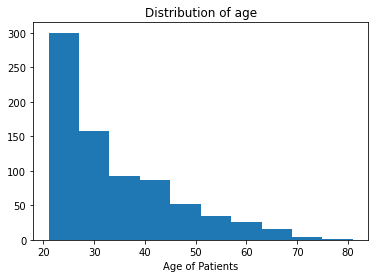

In [17]:
plt.hist(df.age)
plt.xlabel("Age of Patients")
plt.title("Distribution of age")

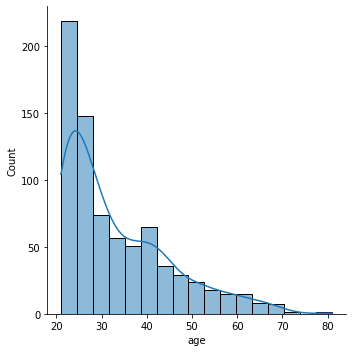

In [21]:
sns.displot(data=df, x="age", kde=True)

## 11. Analyze and tabulate the relationship of age, BMI of patients with respect to the class.

In [22]:
df.age.corr(df.mass)

0.036241870092294105

In [23]:
data = df.groupby('class')
data.first()

,preg,plas,pres,skin,insu,mass,pedi,age
class,,,,,,,,
0,1,85,66,29,0,26.6,0.351,31
1,6,148,72,35,0,33.6,0.627,50


In [24]:
positive_df = df[df['class']==1]
positive_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [25]:
negative_df = df[df['class']!=1]
negative_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [26]:
print("The correlation between age and BMI for patients tested positive: ",positive_df['age'].corr(positive_df['mass']))

The correlation between age and BMI for patients tested positive:  -0.18801168594424938


Text(0.5, 1.0, 'Tested_Positive')

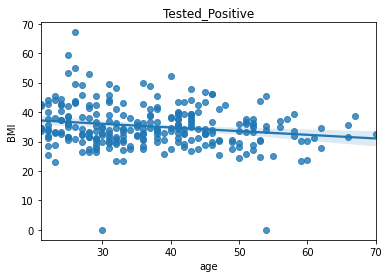

In [31]:
sns.regplot(x=positive_df['age'],y=positive_df['mass'])
plt.ylabel("BMI")
plt.title("Tested_Positive")

In [28]:
print("The correlation between age and BMI for patients tested positive: ",negative_df['age'].corr(negative_df['mass']))

The correlation between age and BMI for patients tested positive:  0.03606979176578635


Text(0.5, 1.0, 'Tested_Negative')

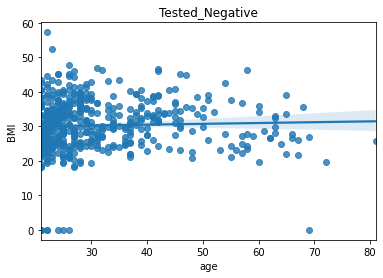

In [29]:
sns.regplot(x=negative_df['age'],y=negative_df['mass'])
plt.ylabel("BMI")
plt.title("Tested_Negative")

## 12. Tabulate the class label and comment on whether the classes are balanced

In [32]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [33]:
(df['class'].value_counts()/768)*100    # percentages of different classes

0    65.104167
1    34.895833
Name: class, dtype: float64

## the two classes are unbalanced

## 13. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.
 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
x = df.drop('class',axis=1)

In [62]:
x

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [37]:
y = df['class']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [43]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
df.corr()['class']

preg     0.221898
plas     0.466581
pres     0.065068
skin     0.074752
insu     0.130548
mass     0.292695
pedi     0.173844
age      0.238356
class    1.000000
Name: class, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
model.fit(x_train,y_train)

C:\Users\tbala\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
model.coef_

array([[ 0.08528124,  0.03447238, -0.01082114,  0.0063655 , -0.0013322 ,
         0.08852982,  0.73271479,  0.02415027]])

In [46]:
model.score(x_test,y_test)

0.7792207792207793

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [55]:
x.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [64]:
x.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

## Feature Engineering

### Here Feature Scaling is done due to large variance in the features

In [65]:
x = sc.fit_transform(x)

In [67]:
x = pd.DataFrame(x , columns = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'] )
x.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [94]:
new_model = LogisticRegression()

In [95]:
new_model.fit(x_train,y_train)

LogisticRegression()

In [96]:
new_model.score(x_test,y_test)

0.7878787878787878

## we can increase the accuracy of the model by considering only the highly correlated attributes in training the model :)

In [54]:
y_predicted = model.predict(x_test)

In [48]:
y_actual = y_test

## 14. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.


In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted,y_actual)

In [98]:
print(cm)

[[141  35]
 [ 16  39]]


Text(33.0, 0.5, 'y_actual')

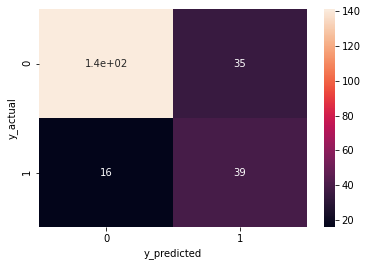

In [99]:
sns.heatmap(cm,annot=True)
plt.xlabel("y_predicted")
plt.ylabel("y_actual")

## 15. Compute accuracy rate, true positive and true negative rate and comment on the performance.

In [100]:
tp = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
tn = cm[1,1]
accuracy_rate = ((tp+tn)/(tp+tn+fn+fp))
accuracy_rate*100

77.92207792207793

In [101]:
true_positive_rate = tp/(tp+fn)
true_positive_rate

0.8980891719745223

### true_positive_rate  = 0.8980891719745223

In [102]:
true_negative_rate = tn/(tn+fp)
true_negative_rate

0.527027027027027

### true_negative_rate  = 0.527027027027027

### Here true positive rate is much higher than the true negative rate which means that our model is better in predicting the positive cases accurately than the negative cases THIS IS DUE TO IMBALANCE IN THE DATA

In [103]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

## 16. Visualize the ROC curve, and comment on the performance of the classifier.


In [104]:
y_test.shape

(231,)

In [105]:
from sklearn import metrics

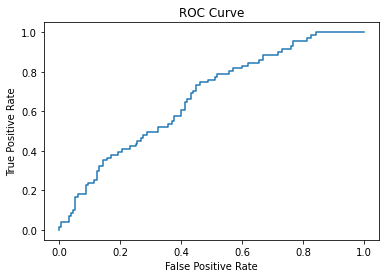

In [109]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)



plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()